# Preparation

Preparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `SC_HW1_bank_data.csv` sebelum tahap pemodelan :
1. Import Library
2. Input Dataset
3. Preprocessing
4. Train-Test Split

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Input Dataset

In [ ]:
#Membaca data dan memasukkannya ke dalam bentuk Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/SC_HW1_bank_data.csv')

In [ ]:
#Jalankan code untuk mengecek nama kolom yang tersedia
df.columns

Index(['RowNumber', 'CustomerId', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df

,RowNumber,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [ ]:
#Hilangkan kolom yang dirasa tidak relevan dengan model (contoh: ID). None dapat diisi dengan nama-nama kolom yang akan digunakan.
#Contoh df = df[['X1','X2', 'Y']].copy()

#START CODE
df = df[['Geography','Age','Tenure','Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary','Exited']].copy()

In [ ]:
df

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,42,3,75075.31,2,1,0,92888.52,1,0,1,0


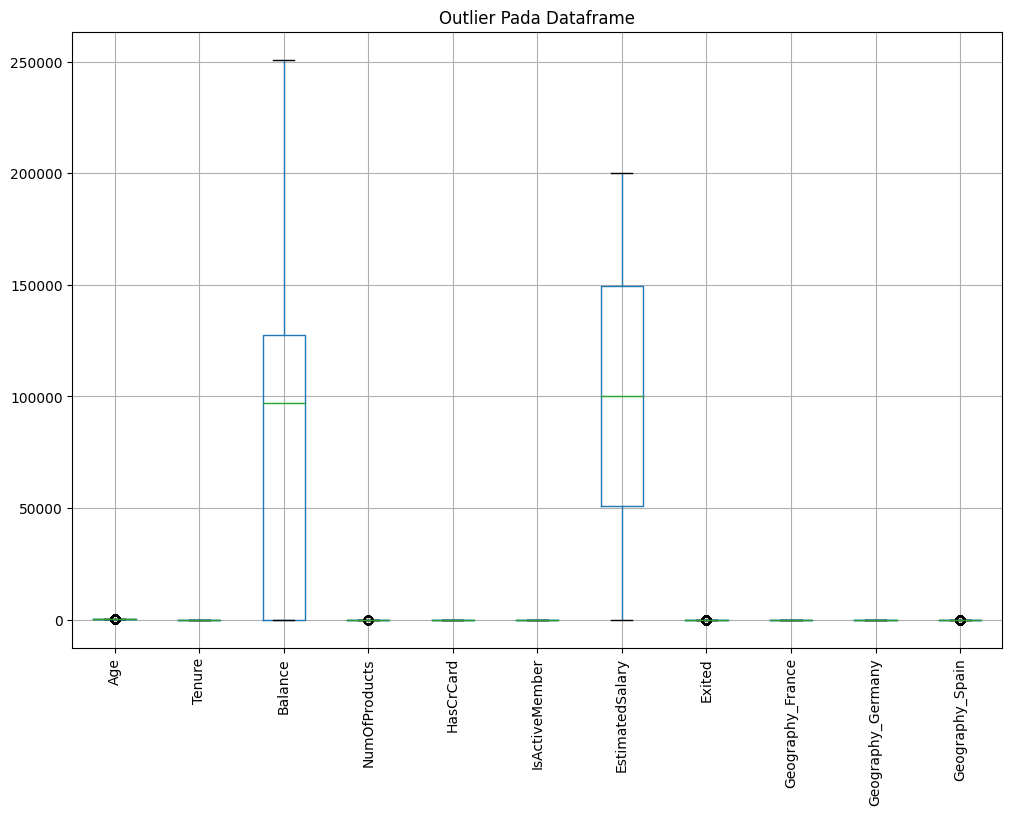

In [ ]:
# Mendeteksi outlier
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Outlier Pada Dataframe')
plt.xticks(rotation=90)
plt.show()

## Preprocessing

In [ ]:
#Lakukan One-Hot Encoder untuk data categorical, dengan fungsi pandas get_dummies

#START CODE
# Menerapkan One-Hot Encoding pada kolom kategori
df = pd.get_dummies(df, columns=['Geography'])

In [ ]:
df

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [ ]:
#Pisahkan mana X (feature) dengan Y,
#Y adalah kolom "Exited"

#START CODE
# Pisahkan fitur (X) dan target (Y)
X = df.drop('Exited', axis=1)  # Mengambil semua kolom kecuali 'Exited'
y = df['Exited']  # Mengambil kolom 'Exited' sebagai target (Y)

In [ ]:
X

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,42,2,0.00,1,1,1,101348.88,1,0,0
1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,42,8,159660.80,3,1,0,113931.57,1,0,0
3,39,1,0.00,2,0,0,93826.63,1,0,0
4,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,1,0,0
9996,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,36,7,0.00,1,0,1,42085.58,1,0,0
9998,42,3,75075.31,2,1,0,92888.52,0,1,0


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#Lakukan Scaler dan/atau Noermalisasi jika diperlukan
from sklearn.preprocessing import MinMaxScaler

#START CODE
scaler = MinMaxScaler()
# Melakukan penskalaan pada fitur (X)
X_transform = scaler.fit_transform(X)

In [ ]:
print("X (Fitur setelah scaling):")
print(X_transform)

print("\nY (Target):")
print(y)

X (Fitur setelah scaling):
           Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     0.324324     0.2  0.000000       0.000000        1.0             1.0   
1     0.310811     0.1  0.334031       0.000000        0.0             1.0   
2     0.324324     0.8  0.636357       0.666667        1.0             0.0   
3     0.283784     0.1  0.000000       0.333333        0.0             0.0   
4     0.337838     0.2  0.500246       0.000000        1.0             1.0   
...        ...     ...       ...            ...        ...             ...   
9995  0.283784     0.5  0.000000       0.333333        1.0             0.0   
9996  0.229730     1.0  0.228657       0.000000        1.0             1.0   
9997  0.243243     0.7  0.000000       0.000000        0.0             1.0   
9998  0.324324     0.3  0.299226       0.333333        1.0             0.0   
9999  0.135135     0.4  0.518708       0.000000        1.0             0.0   

      EstimatedSalary  Geography_Fra

In [ ]:
#Ini digunakan jika dilakukan scaler/Normalisas. Jika tidak, code ini bisa dilewat dan diganti dengan code yang ada di dalam komen
X_transform = pd.DataFrame(X_transform, columns = X.columns)
#X_transform = X.copy()

In [ ]:
X_transform

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0
1,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0
2,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0
3,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0
4,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,1.0,0.0,0.0
9996,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,1.0,0.0,0.0
9997,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,0.0,0.0
9998,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,0.0,1.0,0.0


## Train-Test Split

In [ ]:
#Split menjadi train dan test dengan test_size 25%
#Tidak perlu mengubah code ini

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 0.25,random_state = 123)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1520
Before OverSampling, counts of label '0': 5980 

After OverSampling, the shape of train_X: (11960, 10)
After OverSampling, the shape of train_y: (11960,) 

After OverSampling, counts of label '1': 5980
After OverSampling, counts of label '0': 5980


In [ ]:
X_train.shape, y_train.shape

((7500, 10), (7500,))

# Modeling

## Model1

### Soal :
Jelaskan secara Singkat Model pertama yang digunakan!

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Membuat model Logistik Regresi
model1 = LogisticRegression()

# Menentukan parameter grid yang akan diteliti
params = {
    'tol': [0.1, 0.01, 0.001],
    'C': [0.5, 1.0, 1.5, 2.0]
}

# Membuat objek GridSearchCV
grid = GridSearchCV(
    estimator=model1,
    param_grid=params,
    scoring='accuracy',
    n_jobs=10,
    cv=10
)

grid.fit(X_train,y_train)
# Menampilkan parameter terbaik
best_params = grid.best_params_
print("Parameter terbaik:", best_params)

Parameter terbaik: {'C': 0.5, 'tol': 0.1}


In [ ]:
#lakukan evaluasi dengan beberapa maetric di bawah ini
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1983
           1       0.66      0.17      0.27       517

    accuracy                           0.81      2500
   macro avg       0.74      0.57      0.58      2500
weighted avg       0.79      0.81      0.76      2500


[[1938   45]
 [ 428   89]]

0.8108


## Model2
### Soal :
Jelaskan secara Singkat Model ke-2 yang digunakan!

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Membuat model XGBoost
model2 = xgb.XGBClassifier()

# Menentukan parameter grid yang akan diteliti
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
}

# Membuat objek GridSearchCV
grid = GridSearchCV(
    estimator=model2,
    param_grid=params,
    scoring='accuracy',
    n_jobs=10,
    cv=10
)

grid.fit(X_train,y_train)
# Menampilkan parameter terbaik
best_params = grid.best_params_
print("Parameter terbaik:", best_params)

Parameter terbaik: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1983
           1       0.77      0.51      0.61       517

    accuracy                           0.87      2500
   macro avg       0.83      0.73      0.77      2500
weighted avg       0.86      0.87      0.86      2500


[[1906   77]
 [ 255  262]]

0.8672


## Model3
### Soal :
Jelaskan secara Singkat Model ke-3 yang digunakan!

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Membuat model Support Vector Machine (SVM)
model3 = SVC()

# Menentukan parameter grid yang akan diteliti
params = {
    'tol': [0.1, 0.01, 0.001],
    'C': [0.5, 1.0, 1.5, 2.0]
}

# Membuat objek GridSearchCV
grid = GridSearchCV(
    estimator=model3,
    param_grid=params,
    scoring='accuracy',
    n_jobs=10,
    cv=10
)

grid.fit(X_train,y_train)
# Menampilkan parameter terbaik
best_params = grid.best_params_
print("Parameter terbaik:", best_params)

Parameter terbaik: {'C': 2.0, 'tol': 0.01}


In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1983
           1       0.86      0.35      0.50       517

    accuracy                           0.85      2500
   macro avg       0.86      0.67      0.71      2500
weighted avg       0.86      0.85      0.83      2500


[[1954   29]
 [ 334  183]]

0.8548


## Tarik Kesimpulan Model Mana yang terbaik beserta alasannya

* Berdasarkan skor akurasi yang diperoleh, dapat disimpulkan bahwa model XGBoost dengan grid hyperparameter (0.87) adalah model terbaik dari ketiga model yang digunakan karena model XGBoost mencapai akurasi yang lebih tinggi. Dimana pada model Logistik Regresi (0.8108) dan SVM (0.8548) dengan konfigurasi parameter yang diuji.
* Alasan mengapa XGBoost sering diunggulkan adalah karena ini adalah algoritma ensemble yang sangat kuat. Setelah melakukan tuning hyperparameter secara cermat, XGBoost sering kali melampaui model lain dalam berbagai tugas Machine Learning. Tingkat akurasi yang lebih tinggi menandakan kemampuan model XGBoost dalam melakukan prediksi yang lebih baik terhadap dataset yang digunakan.